# Sentimen Analisis

# Import Library

In [1]:
!pip install google-play-scraper

In [2]:
!pip install gensim

In [3]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all, search

In [4]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


In [5]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scraping Dataset

In [6]:
result = search("iPusnas", lang="id", country="id")
for app in result:
  print("Title: ", app['title'])
  print("App id: ", app['appId'])

Title:  iPusnas
App id:  mam.reader.ipusnas
Title:  Gramedia Digital
App id:  com.appsfoundry.scoop
Title:  Google Play Buku
App id:  com.google.android.apps.books
Title:  Fizzo - Novel & Drama
App id:  e.books.reading.apps
Title:  Wattpad - Baca & Tulis Cerita
App id:  wp.wattpad
Title:  Libby, oleh OverDrive
App id:  com.overdrive.mobile.android.libby
Title:  Tapon
App id:  com.tapon.read
Title:  ReadEra: pembaca buku pdf epub
App id:  org.readera


In [7]:
# Ambil ulasan dari aplikasi dengan ID 'mam.reader.ipusnas' di Google Play Store
scrapreview = reviews_all(
    'mam.reader.ipusnas',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000
)

In [8]:
import csv

with open('ulasan_ipusnas.csv', mode='w', newline='', encoding='utf-8') as file:
  writer = csv.writer(file)
  writer.writerow(['review'])
  for review in scrapreview:
    writer.writerow([review['content']])

# Loading Dataset

In [9]:
data_review = pd.DataFrame(scrapreview)
data_review.shape

(15722, 11)

In [10]:
data_review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,374e6347-0b67-4281-bd15-8665be21f558,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sejauh ini koleksi buku belum terlalu lengkap ...,3,160,1.6.4,2024-07-01 16:14:02,Hallo Sesilia! Kami mohon maaf atas ketidaknya...,2024-07-02 01:45:27,1.6.4
1,14c1c62f-cb22-4d88-886a-72be622a99e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sering bermasalah dgn sinyal, padahal sinyal s...",2,194,1.4.7,2020-06-21 04:02:46,Hallo Muhdar! Kami mohon maaf atas kendala dan...,2020-06-21 06:56:19,1.4.7
2,f8a4d1aa-b91d-4941-a3ed-77fdb02225de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"edit 2025: makin banyak buku yg ""terlalu ringa...",3,9,2.0.4,2025-03-30 18:41:03,Terima kasih sudah memberikan ulasan mengenai ...,2020-08-27 06:27:47,2.0.4
3,0541cbe7-316d-4049-9153-b536917a907c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,iseng install ipusnas lagi. kaget bgt tbtb tam...,2,5,2.0.4,2025-04-23 10:31:51,None,NaT,2.0.4
4,96270082-51c0-4d14-9faf-3f06541388f5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus banget, cuman ada beberapa k...",3,1,2.0.4,2025-04-12 02:24:08,None,NaT,2.0.4


In [11]:
data_review.to_csv('ulasan_ipusnas.csv', index=False)

In [12]:
data_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15722 entries, 0 to 15721
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              15722 non-null  object        
 1   userName              15722 non-null  object        
 2   userImage             15722 non-null  object        
 3   content               15722 non-null  object        
 4   score                 15722 non-null  int64         
 5   thumbsUpCount         15722 non-null  int64         
 6   reviewCreatedVersion  11897 non-null  object        
 7   at                    15722 non-null  datetime64[ns]
 8   replyContent          12508 non-null  object        
 9   repliedAt             12508 non-null  datetime64[ns]
 10  appVersion            11897 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.3+ MB


In [13]:
# Menghapus baris yang memiliki nilai yang hilang
clean_df = data_review.dropna()
# Tampilkan informasi tentang dataframe
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9586 entries, 0 to 14682
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              9586 non-null   object        
 1   userName              9586 non-null   object        
 2   userImage             9586 non-null   object        
 3   content               9586 non-null   object        
 4   score                 9586 non-null   int64         
 5   thumbsUpCount         9586 non-null   int64         
 6   reviewCreatedVersion  9586 non-null   object        
 7   at                    9586 non-null   datetime64[ns]
 8   replyContent          9586 non-null   object        
 9   repliedAt             9586 non-null   datetime64[ns]
 10  appVersion            9586 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 898.7+ KB


In [14]:
# Hapus baris duplikat
clean_df = clean_df.drop_duplicates()

clean_df.shape

(9586, 11)

# Preprocessing

In [15]:
def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r"http\S+", '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)

  text = text.replace('\n', ' ')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip(' ')
  return text

def casefoldingText(text):
  text = text.lower()
  return text

def tokenizingText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
  text = filtered
  return text

def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  words = text.split()

  stemmed_words = [stemmer.stem(word) for word in words]

  stemmed_text = ' '.join(stemmed_words)

  return stemmed_text

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [16]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [17]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,374e6347-0b67-4281-bd15-8665be21f558,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sejauh ini koleksi buku belum terlalu lengkap ...,3,160,1.6.4,2024-07-01 16:14:02,Hallo Sesilia! Kami mohon maaf atas ketidaknya...,2024-07-02 01:45:27,1.6.4
1,14c1c62f-cb22-4d88-886a-72be622a99e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sering bermasalah dgn sinyal, padahal sinyal s...",2,194,1.4.7,2020-06-21 04:02:46,Hallo Muhdar! Kami mohon maaf atas kendala dan...,2020-06-21 06:56:19,1.4.7
2,f8a4d1aa-b91d-4941-a3ed-77fdb02225de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"edit 2025: makin banyak buku yg ""terlalu ringa...",3,9,2.0.4,2025-03-30 18:41:03,Terima kasih sudah memberikan ulasan mengenai ...,2020-08-27 06:27:47,2.0.4
9,f6743ab1-3fa5-4b4a-9784-4bc9bd9d08f1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin lama, makin menurun kualitas aplikasi in...",1,1,2.0.4,2025-05-01 11:39:37,Hallo Santi! Kami mohon maaf atas ketidaknyama...,2021-10-13 02:15:41,2.0.4
21,c8300548-d25e-423b-98f0-301c37cc3eb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus, banyak pilihan buku. Saran tambah menu ...",3,2,2.0.4,2025-03-09 03:01:43,Hallo Putri! Kami mohon maaf atas ketidaknyama...,2022-08-29 01:28:59,2.0.4
...,...,...,...,...,...,...,...,...,...,...,...
14638,c8507c27-cecb-494b-a4a0-1ea1ce9eaa83,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu,5,2,1.1,2016-11-26 01:09:44,"Terimakasih atas review yang kamu berikan, sem...",2016-12-02 01:32:46,1.1
14642,5d977aa4-bad0-4517-a1ed-84e509f78069,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong disetiap buku dituliskan keterangan ber...,4,0,1.0.4,2017-01-16 22:24:48,"Halo Nur, terimakasih atas sarannya. Namun unt...",2017-01-17 01:29:10,1.0.4
14663,97a9590f-f857-4530-9e3e-c091ac5ba9cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagguusss sekali,...",5,0,1.0.4,2016-11-30 07:59:36,"Halo Muhammad Nur Abdurrahman, terimakasih ata...",2016-12-02 02:27:21,1.0.4
14670,3802a1b3-47e9-44e2-ba68-1d25db907412,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,1.0.4,2017-05-10 02:23:45,Terimakasih sudah memberikan review mengenai i...,2017-05-10 04:31:33,1.0.4


In [18]:
# Bersihkan teks dan simpan ke kolom text_clean
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Ubah huruf menjadi huruf kecil dan simpan
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan standar dan simpan
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token dan simpan
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop dan simpan
clean_df['text_stopwords'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token menjadi kalimat dan simpan
clean_df['text_akhir'] = clean_df['text_stopwords'].apply(toSentence)

In [19]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopwords,text_akhir
0,374e6347-0b67-4281-bd15-8665be21f558,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sejauh ini koleksi buku belum terlalu lengkap ...,3,160,1.6.4,2024-07-01 16:14:02,Hallo Sesilia! Kami mohon maaf atas ketidaknya...,2024-07-02 01:45:27,1.6.4,Sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,sejauh ini koleksi buku belum terlalu lengkap ...,"[sejauh, ini, koleksi, buku, belum, terlalu, l...","[koleksi, buku, lengkap, berdasarkan, genrepen...",koleksi buku lengkap berdasarkan genrepenulisn...
1,14c1c62f-cb22-4d88-886a-72be622a99e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sering bermasalah dgn sinyal, padahal sinyal s...",2,194,1.4.7,2020-06-21 04:02:46,Hallo Muhdar! Kami mohon maaf atas kendala dan...,2020-06-21 06:56:19,1.4.7,Sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dgn sinyal padahal sinyal sa...,sering bermasalah dengan sinyal padahal sinyal...,"[sering, bermasalah, dengan, sinyal, padahal, ...","[bermasalah, sinyal, sinyal, loading, suka, ga...",bermasalah sinyal sinyal loading suka gagal re...
2,f8a4d1aa-b91d-4941-a3ed-77fdb02225de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"edit 2025: makin banyak buku yg ""terlalu ringa...",3,9,2.0.4,2025-03-30 18:41:03,Terima kasih sudah memberikan ulasan mengenai ...,2020-08-27 06:27:47,2.0.4,edit makin banyak buku yg terlalu ringan Sete...,edit makin banyak buku yg terlalu ringan sete...,edit makin banyak buku yang terlalu ringan set...,"[edit, makin, banyak, buku, yang, terlalu, rin...","[edit, buku, ringan, download, ulang, friendli...",edit buku ringan download ulang friendlistku h...
9,f6743ab1-3fa5-4b4a-9784-4bc9bd9d08f1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin lama, makin menurun kualitas aplikasi in...",1,1,2.0.4,2025-05-01 11:39:37,Hallo Santi! Kami mohon maaf atas ketidaknyama...,2021-10-13 02:15:41,2.0.4,Makin lama makin menurun kualitas aplikasi ini...,makin lama makin menurun kualitas aplikasi ini...,makin lama makin menurun kualitas aplikasi ini...,"[makin, lama, makin, menurun, kualitas, aplika...","[menurun, kualitas, aplikasi, dibuka, loading,...",menurun kualitas aplikasi dibuka loading kemba...
21,c8300548-d25e-423b-98f0-301c37cc3eb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus, banyak pilihan buku. Saran tambah menu ...",3,2,2.0.4,2025-03-09 03:01:43,Hallo Putri! Kami mohon maaf atas ketidaknyama...,2022-08-29 01:28:59,2.0.4,Bagus banyak pilihan buku Saran tambah menu wi...,bagus banyak pilihan buku saran tambah menu wi...,bagus banyak pilihan buku saran tambah menu wi...,"[bagus, banyak, pilihan, buku, saran, tambah, ...","[bagus, pilihan, buku, saran, menu, wishlish, ...",bagus pilihan buku saran menu wishlish masuk l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14638,c8507c27-cecb-494b-a4a0-1ea1ce9eaa83,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu,5,2,1.1,2016-11-26 01:09:44,"Terimakasih atas review yang kamu berikan, sem...",2016-12-02 01:32:46,1.1,Sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]",[membantu],membantu
14642,5d977aa4-bad0-4517-a1ed-84e509f78069,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong disetiap buku dituliskan keterangan ber...,4,0,1.0.4,2017-01-16 22:24:48,"Halo Nur, terimakasih atas sarannya. Namun unt...",2017-01-17 01:29:10,1.0.4,Tolong disetiap buku dituliskan keterangan ber...,tolong disetiap buku dituliskan keterangan ber...,tolong disetiap buku dituliskan keterangan ber...,"[tolong, disetiap, buku, dituliskan, keteranga...","[tolong, disetiap, buku, dituliskan, keteranga...",tolong disetiap buku dituliskan keterangan 

# Pelabelan

In [20]:
import csv
import requests
from io import StringIO

# Load positive lexicon
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')

  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

else:
  print("Failed to fetch positive lexicon data")

# Load negative lexicon
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')

  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

else:
  print("Failed to fetch negative lexicon data")

In [21]:
# Menentukan polaritas sentimen dari komen

def sentiment_analysis_lexicon_indo(text):
  score = 0

  for word in text:
    if (word in lexicon_positive):
      score += lexicon_positive[word]

  for word in text:
    if (word in lexicon_negative):
      score += lexicon_negative[word]

  polarity=''

  if score > 0.1:
      polarity = 'positive'
  elif score < -0.1:
      polarity = 'negative'
  else:
      polarity = 'neutral'

  return score, polarity

In [22]:
results = clean_df['text_stopwords'].apply(sentiment_analysis_lexicon_indo)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    4235
positive    3631
neutral     1720
Name: count, dtype: int64


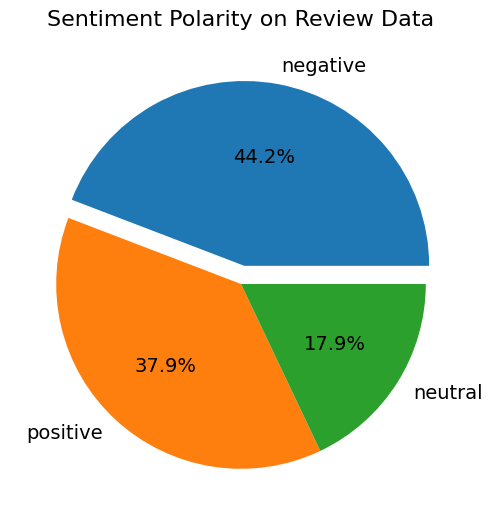

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# Ambil jumlah data polaritas sentimen dari DF
sizes = [count for count in clean_df['polarity'].value_counts()]

# Ambil label atau kategori sentimen dari DF
labels = list(clean_df['polarity'].value_counts().index)

explode = (0.1, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [24]:
def set_dataframe_baru(category):
  pd.set_option('display.max_colwidth', 3000)

  # Membuat DF baru yang hanya berisi tweet category tertentu
  tweets = clean_df[clean_df['polarity'] == category]

  # Memilih kolom tertentu dari DF
  tweets = tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopwords']]

  # Urutkan DF berdasarkan polarity score
  tweets = tweets.sort_values(by='polarity_score', ascending=False)

  # Mengatur ulang index DF agar dari 0
  tweets = tweets.reset_index(drop=True)
  tweets.index += 1
  return tweets

In [25]:
positive_tweets = set_dataframe_baru('positive')
positive_tweets

,text_akhir,polarity_score,polarity,text_stopwords
1,bermanfaat jujur membaca buku digital gambaran isinya gratis sreg isinya beli versi hardcopy menyukai membaca hardcopy aplikasi meminjam buku bagus langsung tempatnya koleksinya lengkap penerbit oke ui pressugm pressipb presskompas gramedia rosda grasindo elex media bhuana ilmu populer qibla dsb berharap majalah digital keluaran kompas gramedia jurnaljurnal ilmiah lipi ui ugm dsb bentuk digital maju perpustakaan ri,36,positive,"[bermanfaat, jujur, membaca, buku, digital, gambaran, isinya, gratis, sreg, isinya, beli, versi, hardcopy, menyukai, membaca, hardcopy, aplikasi, meminjam, buku, bagus, langsung, tempatnya, koleksinya, lengkap, penerbit, oke, ui, pressugm, pressipb, presskompas, gramedia, rosda, grasindo, elex, media, bhuana, ilmu, populer, qibla, dsb, berharap, majalah, digital, keluaran, kompas, gramedia, jurnaljurnal, ilmiah, lipi, ui, ugm, dsb, bentuk, digital, maju, perpustakaan, ri]"
2,terima kasih ipusnas aplikasinya membantu bermanfaat tugas kuliah alhamdulillah terbantu bukubuku disediakan ipusnas saran min alangkah baiknya membaca buku ditambah tools pencarian halaman memudahkan membaca langsung meluncur halaman scroll manual efektif terima kasih,34,positive,"[terima, kasih, ipusnas, aplikasinya, membantu, bermanfaat, tugas, kuliah, alhamdulillah, terbantu, bukubuku, disediakan, ipusnas, saran, min, alangkah, baiknya, membaca, buku, ditambah, tools, pencarian, halaman, memudahkan, membaca, langsung, meluncur, halaman, scroll, manual, efektif, terima, kasih]"
3,aplikasi bagus bermanfaat pribadi suka membaca menambah wawasan asik membaca suka loug semoga diperbaiki terimakasih ipusnas semoga ipusnas menambah minat baca masyarakat infonesia,32,positive,"[aplikasi, bagus, bermanfaat, pribadi, suka, membaca, menambah, wawasan, asik, membaca, suka, loug, semoga, diperbaiki, terimakasih, ipusnas, semoga, ipusnas, menambah, minat, baca, masyarakat, infonesia]"
4,assalamualaikum suka membaca buku mudah akses proses peminjaman mudah jarak perpustakaan rumah terimakasih aplikasi membantu gemar membaca masukkan dijadikan mode gelap mata capek lihat layar ponsel terang maturnuwun semoga proses terima kasih kasih,31,positive,"[assalamualaikum, suka, membaca, buku, mudah, akses, proses, peminjaman, mudah, jarak, perpustakaan, rumah, terimakasih, aplikasi, membantu, gemar, membaca, masukkan, dijadikan, mode, gelap, mata, capek, lihat, layar, ponsel, terang, maturnuwun, semoga, proses, terima, kasih, kasih]"
5,suka apk tolong donk ditambah fitur fitur pepanjangan berlakunya buku notifikasinya tolong langsung kirim android biar persediaan buku deh edit tolong dimasukan novel terbaru misalny matahari tere liye ciderela batavia tolong katerogi katerogi novel petualangan novel novel b katerogi buku pelajaran buku buku b tolong update semoga ulasan membantu,29,positive,"[suka, apk, tolong, donk, ditambah, fitur, fitur, pepanjangan, berlakunya, buku, notifikasinya, tolong, langsung, kirim, android, biar, persediaan, buku, deh, edit, tolong, dimasukan, novel, terbaru, misalny, matahari, tere, liye, ciderela, batavia, tolong, katerogi, katerogi, novel, petualangan, novel, novel, b, katerogi, buku, pelajaran, buku, buku, b, tolong, update, semoga, ulasan, membantu]"
...,...,...,...,...
3627,kasih bintang novel lengkap agama spiritual suka,1,positive,"[kasih, bintang, novel, lengkap, agama, spiritual, suka]"
3628,support tablet melulu,1,positive,"[support, tablet, melulu]"
3629,duhh erorr genting banget lohhh hadeuhhh kecewa,1,positive,"[duhh, erorr, genting, banget, lohhh, hadeuhhh, kecewa]"
3630,tolong tambahin notif buku udh return,1,positive,"[tolong, tambahin, notif, buku, udh, return]"


In [26]:
negative_tweets = set_dataframe_baru('negative')
negative_tweets

,text_akhir,polarity_score,polarity,text_stopwords
1,lumayan bagusmakasih ipusnas,-1,negative,"[lumayan, bagusmakasih, ipusnas]"
2,bagus bangett dijamin gk nyesel download bermanfaat menambah wawasan best apk ever v,-1,negative,"[bagus, bangett, dijamin, gk, nyesel, download, bermanfaat, menambah, wawasan, best, apk, ever, v]"
3,bugnya bagus huwaaa bagus deh semangat mempertahankannya developer,-1,negative,"[bugnya, bagus, huwaaa, bagus, deh, semangat, mempertahankannya, developer]"
4,akses logout masuk buku pinjem kubaca,-1,negative,"[akses, logout, masuk, buku, pinjem, kubaca]"
5,kadang suka error pas cari buku jaringannya bagus sayang banget,-1,negative,"[kadang, suka, error, pas, cari, buku, jaringannya, bagus, sayang, banget]"
...,...,...,...,...
4231,pinjem buku tulisan gagal verifikasi cek kotak masuk kotak spam ditemukan silakan hubungi admin ispunas verifikasi please tulisan kaya begituuu login baca marah banget deh bikin kesel,-29,negative,"[pinjem, buku, tulisan, gagal, verifikasi, cek, kotak, masuk, kotak, spam, ditemukan, silakan, hubungi, admin, ispunas, verifikasi, please, tulisan, kaya, begituuu, login, baca, marah, banget, deh, bikin, kesel]"
4232,gagal pinjem bukunya bad request gagal gegara hold hitam adakah solusinya juragan perasaan update sebel ihh,-30,negative,"[gagal, pinjem, bukunya, bad, request, gagal, gegara, hold, hitam, adakah, solusinya, juragan, perasaan, update, sebel, ihh]"
4233,aplikasi lumayan bagus kontribusi literasi bangsa sayang aplikasi kekurangan salah susah login memakai akun facebook tolonh aplikasi kembangkan aplikasi sekelas mentri kekurangan konyol,-35,negative,"[aplikasi, lumayan, bagus, kontribusi, literasi, bangsa, sayang, aplikasi, kekurangan, salah, susah, login, memakai, akun, facebook, tolonh, aplikasi, kembangkan, aplikasi, sekelas, mentri, kekurangan, konyol]"
4234,mencoba error saran mohon tingkatkan error aplikasi sebelumsebelumnya registrasi gagal aplikasi bagus bukubuku bagus beli grmeda mahal aplikasi membacanya gratis org aplikasi literasi indonesia rendah,-36,negative,"[mencoba, error, saran, mohon, tingkatkan, error, aplikasi, sebelumsebelumnya, registrasi, gagal, aplikasi, bagus, bukubuku, bagus, beli, grmeda, mahal, aplikasi, membacanya, gratis, org, aplikasi, literasi, indonesia, rendah]"


In [27]:
neutral_tweets = set_dataframe_baru('neutral')
neutral_tweets

,text_akhir,polarity_score,polarity,text_stopwords
1,bukunya ditambah,0,neutral,"[bukunya, ditambah]"
2,tolong perbaiki sistem cover buku tiba² cuman logo ipusnas pinjam buku cover buku perbanyak stok buku buku² psikologi sm self improvement,0,neutral,"[tolong, perbaiki, sistem, cover, buku, tiba², cuman, logo, ipusnas, pinjam, buku, cover, buku, perbanyak, stok, buku, buku², psikologi, sm, self, improvement]"
3,admin aplikasi bermanfaat saran tingkatkan aplikasi pencarianberdasarkan anga judul pengarang lain-lain tambahkan pencarian halaman dlm buku membaca kmi kesulitan melompat halaman perbanyak koleksi buku mahasiswa pas pasan aplikasi butuhkan terima kasih,0,neutral,"[admin, aplikasi, bermanfaat, saran, tingkatkan, aplikasi, pencarianberdasarkan, anga, judul, pengarang, lain-lain, tambahkan, pencarian, halaman, dlm, buku, membaca, kmi, kesulitan, melompat, halaman, perbanyak, koleksi, buku, mahasiswa, pas, pasan, aplikasi, butuhkan, terima, kasih]"
4,lag error min aplikasinya keren kekurangan lag error fitur search optimal kadang sesuai diketikan kelebihan bermanfaat mempercepat akses informasi lain-lain tolong perbaiki min terima kasih,0,neutral,"[lag, error, min, aplikasinya, keren, kekurangan, lag, error, fitur, search, optimal, kadang, sesuai, diketikan, kelebihan, bermanfaat, mempercepat, akses, informasi, lain-lain, tolong, perbaiki, min, terima, kasih]"
5,bagus peminjaman buku cepat wishlist ipusnas membaca distraksi perubahan layar pilihan bookmark membaca halaman duduk kesel kena distraksi gulir halaman mohon diperbaiki tim ipusnas,0,neutral,"[bagus, peminjaman, buku, cepat, wishlist, ipusnas, membaca, distraksi, perubahan, layar, pilihan, bookmark, membaca, halaman, duduk, kesel, kena, distraksi, gulir, halaman, mohon, diperbaiki, tim, ipusnas]"
...,...,...,...,...
1716,membantu mahasiwa tingkat pandemi dimana perpustakaan tutup buku harapannya semoga ditambah koleksi bukunya fitur pencarian buku mempermudah pencarian topik sesuai didalam buku terimakasih,0,neutral,"[membantu, mahasiwa, tingkat, pandemi, dimana, perpustakaan, tutup, buku, harapannya, semoga, ditambah, koleksi, bukunya, fitur, pencarian, buku, mempermudah, pencarian, topik, sesuai, didalam, buku, terimakasih]"
1717,kesini koo susah ipusnas suka log log susah banget minjem buku keseringan network timeout jaringan stabil nyoba buka aplikasi lancar ajaa tolong diperbaiki sedia,0,neutral,"[kesini, koo, susah, ipusnas, suka, log, log, susah, banget, minjem, buku, keseringan, network, timeout, jaringan, stabil, nyoba, buka, aplikasi, lancar, ajaa, tolong, diperbaiki, sedia]"
1718,aplikasi membantu malas perpustakaan offline cari buku menyebar sesuai rak koleksi lumayan disayangkan bukubuku menunjang penelitian pendidikan kuali kuanti ptk rd terbatas materi semoga diperbanyak koleksi bukunya tahuntahun tahuntahun setelahnya terbitan terbaru terima kasih,0,neutral,"[aplikasi, membantu, malas, perpustakaan, offline, cari, buku, menyebar, sesuai, rak, koleksi, lumayan, disayangkan, bukubuku, menunjang, penelitian, pendidikan, kuali, kuanti, ptk, rd, terbatas, materi, semoga, diperbanyak, koleksi, bukunya, tahuntahun, tahuntahun, setelahnya, terbitan, terbaru, terima, kasih]"
1719,aplikasinya bagus banget berguna repotrepot beli buku kendala banget log log susah banget banget jaringan internet bagus mohon perbaikannya,0,neutral,"[aplikasinya, bagus, banget, berguna, repotrepot, beli, buku, kendala, banget, log, log, susah, banget, banget, jaringan, internet, bagus, mohon, perbaikannya]"


In [28]:
# Word Cloud
def word_cloud(df, title):
  list_words = ''

  for tweet in df['text_stopwords']:
    for word in tweet:
      list_words += ' ' + (word)

  # Buat objek WordCloud
  wordcloud = WordCloud(
      width=600,
      height=400,
      background_color='white',
      min_font_size=10
      ).generate(list_words)

  fig, ax = plt.subplots(figsize=(8, 6))

  ax.set_title(f'Word Cloud of {title}', fontsize=18)

  ax.grid(False)

  ax.imshow((wordcloud))

  fig.tight_layout(pad=0)

  ax.axis('off')

  plt.show()

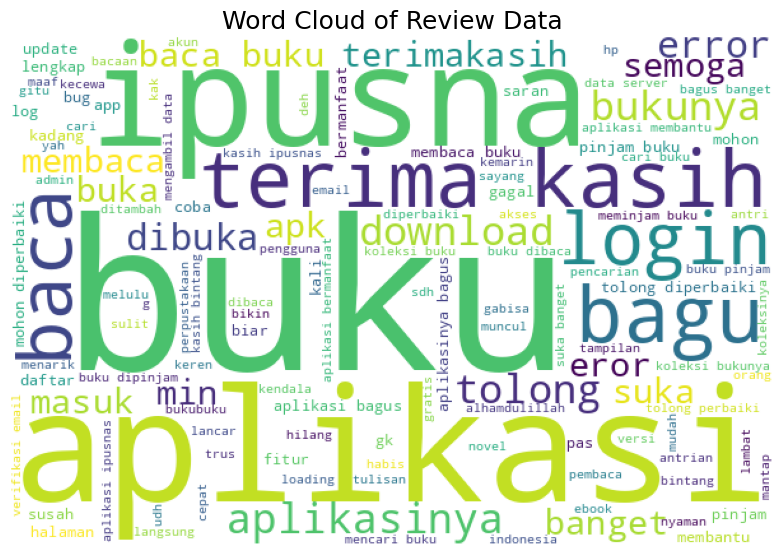

In [29]:
# WordCloud untuk seluruh review
word_cloud(clean_df, 'Review Data')

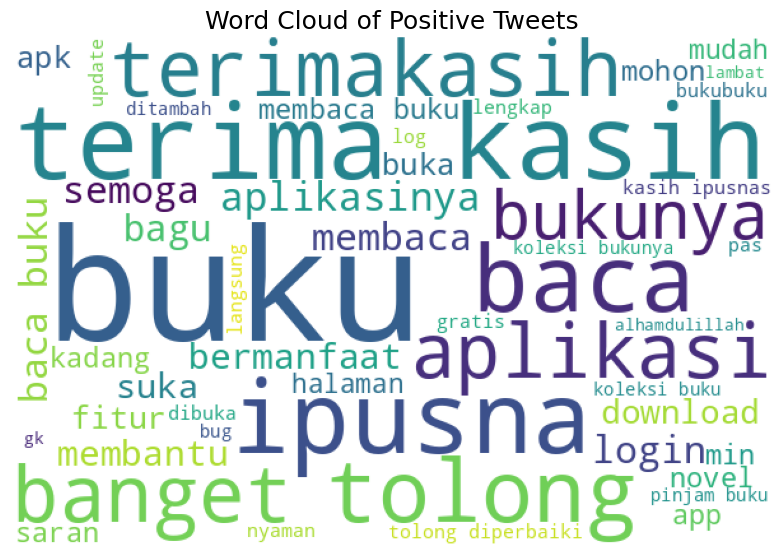

In [30]:
# WordCloud untuk review positif
word_cloud(positive_tweets, 'Positive Tweets')

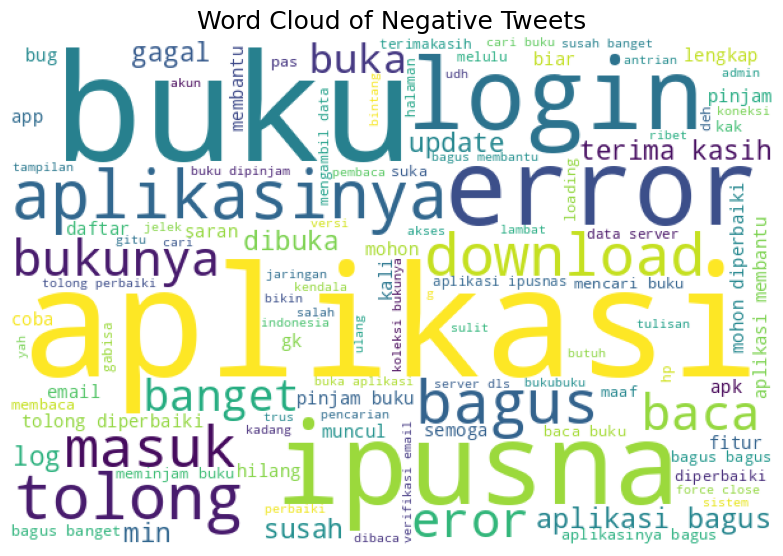

In [31]:
# WordCloud untuk review negatif
word_cloud(negative_tweets, 'Negative Tweets')

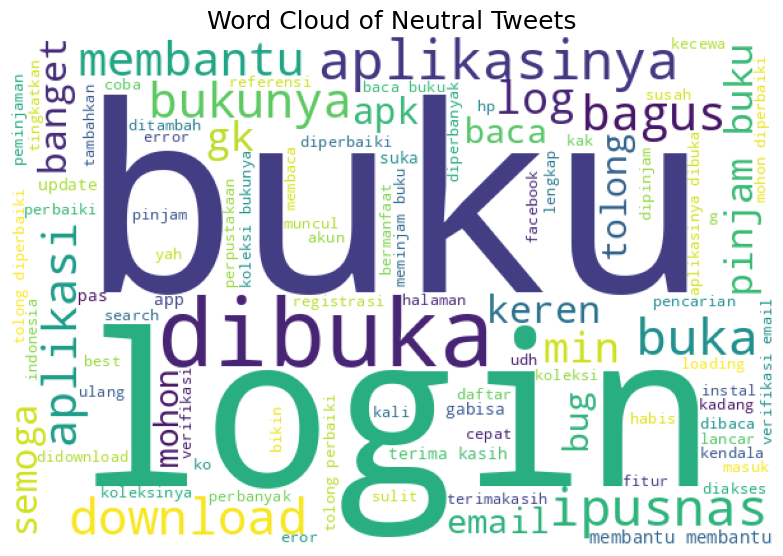

In [32]:
# Wordcloud untuk review netral
word_cloud(neutral_tweets, 'Neutral Tweets')

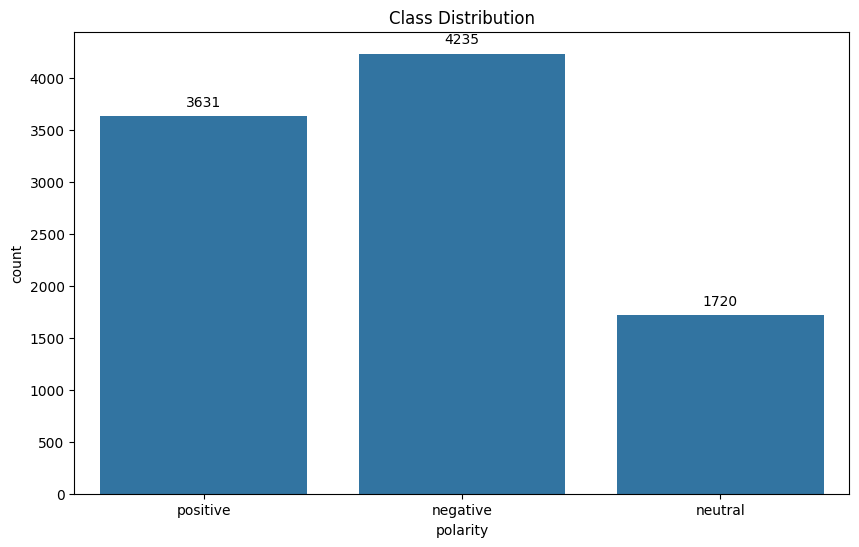

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))

# Cek distribusi kelas
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Tambah counts above the bars on the plot
for p in class_dist_plot.patches:
  class_dist_plot.annotate(
      format(p.get_height(), '.0f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center',
      va='center',
      xytext=(0, 10),
      textcoords='offset points'
      )
plt.show()

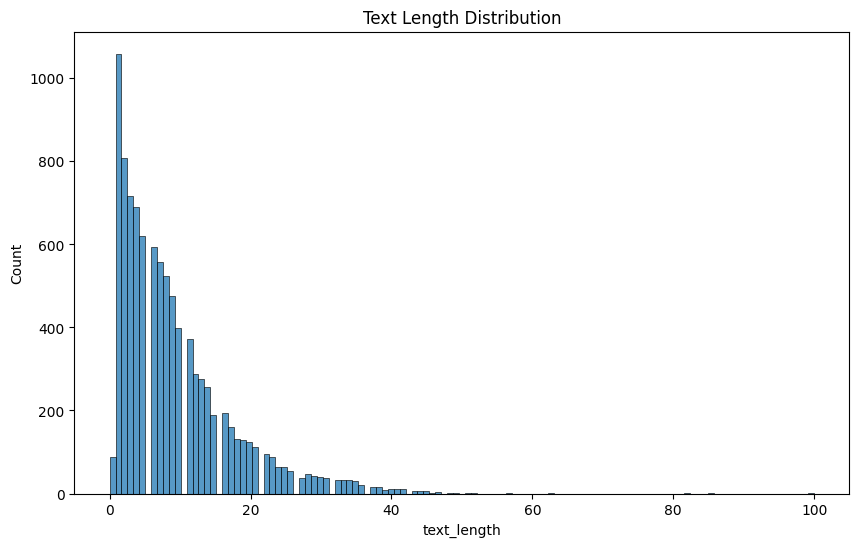

In [34]:
plt.figure(figsize=(10, 6))

# Visualize the text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

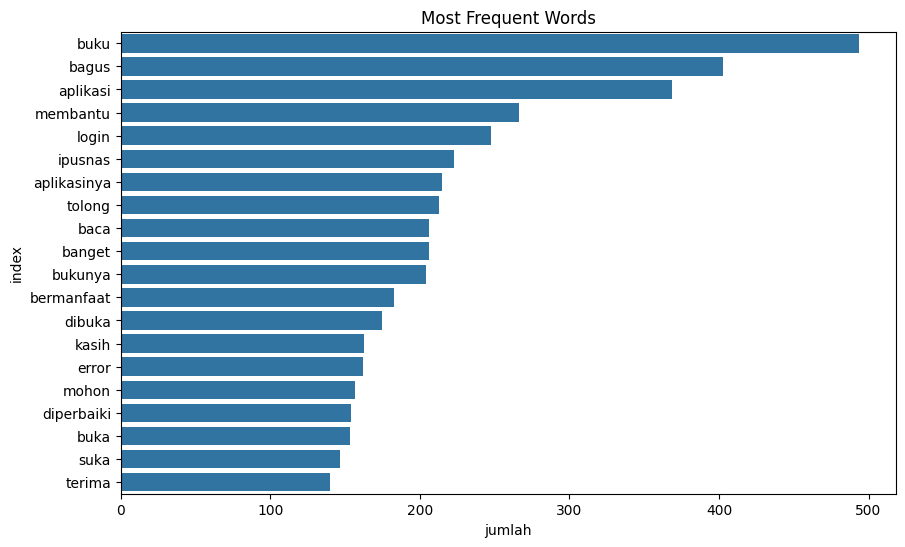

In [35]:
plt.figure(figsize=(10, 6))

# Visualize the most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Data Splitting

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [37]:
# Pisahkan data menjadi fitur dan label
X = clean_df['text_akhir']
y = clean_df['polarity']

In [58]:
# Ekstrak fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8, binary=True)
X_tfidf = tfidf.fit_transform(X)

In [59]:
# Konversi mejadi DF
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,admin,akses,akun,alhamdulillah,anak,antri,antrian,apk,aplikasi,aplikasinya,...,tulisan,tulisannya,uang,udh,ulang,update,verifikasi,versi,wawasan,yah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.277173,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.237455,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.430091,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9582,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9583,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9584,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [42]:
# Ekstraksi fitur dengna Word2Vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

word2vec = Word2Vec(sentences=clean_df['text_stopwords'], vector_size=200, window=5, min_count=1, workers=4)
def get_average_vector(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(vectors, axis=0)

X_word2vec = np.array([
    get_average_vector(sentence, word2vec, 200)
    for sentence in clean_df['text_stopwords']
])


In [43]:
# Konversi ke DF
word2vec_df = pd.DataFrame(X_word2vec)
word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.036625,-0.063403,0.008564,0.532463,0.266680,-0.393582,0.046524,0.543633,-0.284347,0.167143,...,0.039386,-0.046473,-0.049963,-0.145166,0.185875,0.309582,-0.014487,-0.277581,-0.039509,-0.153846
1,-0.058508,-0.079540,0.019119,0.639677,0.347297,-0.473194,0.061292,0.672077,-0.323793,0.225111,...,0.054444,-0.051441,-0.069544,-0.166934,0.237751,0.409521,0.013880,-0.316047,-0.063714,-0.184446
2,-0.047094,-0.064405,0.017506,0.505674,0.276339,-0.389364,0.046780,0.539098,-0.263633,0.170821,...,0.042455,-0.041440,-0.058401,-0.139635,0.183236,0.319142,0.004492,-0.257569,-0.043039,-0.151060
3,-0.050672,-0.071455,0.009265,0.545443,0.292986,-0.399733,0.050387,0.571245,-0.277120,0.184159,...,0.043671,-0.046870,-0.060835,-0.143294,0.204184,0.328523,0.004929,-0.274214,-0.055329,-0.157639
4,-0.045008,-0.065045,0.014752,0.518482,0.271860,-0.391033,0.047586,0.542134,-0.273765,0.173484,...,0.039360,-0.042603,-0.053584,-0.139770,0.186000,0.319863,-0.003085,-0.264132,-0.041503,-0.154090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,0.009716,-0.075366,-0.016441,0.805880,0.361840,-0.549140,0.085819,0.805298,-0.442953,0.214183,...,0.057665,-0.064995,-0.055726,-0.263021,0.313131,0.387241,-0.067583,-0.432497,-0.061714,-0.201579
9582,-0.058942,-0.082982,0.020878,0.631602,0.324194,-0.487436,0.064581,0.651900,-0.331950,0.202808,...,0.050617,-0.047821,-0.063350,-0.173737,0.214745,0.387965,-0.006438,-0.316823,-0.051464,-0.186819
9583,0.000467,-0.000613,-0.001964,0.002452,0.004584,-0.000858,0.000592,0.000737,-0.003905,-0.000463,...,0.000793,-0.003197,0.002247,0.004127,0.002638,0.001631,-0.001952,-0.000600,-0.002785,0.003792
9584,-0.002175,-0.003027,0.005659,0.064505,0.036842,-0.044633,0.007472,0.067175,-0.032531,0.021988,...,0.006866,-0.004418,-0.010630,-0.015661,0.025532,0.035024,0.004949,-0.035315,-0.012163,-0.015156


In [60]:
# Bagi data menjadi data latih dari data hasil TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=32)

In [45]:
# Bagi data menjadi data latih dari data hasil Word2Vec
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_word2vec, y, test_size=0.2, random_state=32)

# Pemodelan

## Naive Bayes
Menggunakan data dari hasil TF-IDF

In [61]:
naive_bayes = BernoulliNB()

# latih model
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pleatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print(f'Naive Bayes - Akurasi data latih: {accuracy_train_nb}')
print(f'Naive Bayes - Akurasi data test: {accuracy_test_nb}')

Naive Bayes - Akurasi data latih: 0.6999217527386542
Naive Bayes - Akurasi data test: 0.691866527632951


## Random Forest
Menggunakan data dari hasil TF-IDF

In [62]:
from sklearn.ensemble import RandomForestClassifier
# Buat objek
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)

# Melatih model random forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print(f'Random Forest - Akurasi data latih: {accuracy_train_rf}')
print(f'Random Forest - Akurasi data test: {accuracy_test_rf}')

Random Forest - Akurasi data latih: 0.9627021387584768
Random Forest - Akurasi data test: 0.7846715328467153


## Decision Tree
Menggunakan data dari hasil TF-IDF, karna jika dari Word2vec rawan overfitting

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek
decision_tree = DecisionTreeClassifier()

# Melatih model
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print(f'Decision Tree - Akurasi data latih: {accuracy_train_dt}')
print(f'Decision Tree - Akurasi data test: {accuracy_test_dt}')

Decision Tree - Akurasi data latih: 0.9627021387584768
Decision Tree - Akurasi data test: 0.7132429614181439


## Logistic Regression
Menggunakan data dari hasil Word2Vec

In [66]:
from sklearn.linear_model import LogisticRegression

# Buat objek
logistic_regression = LogisticRegression(max_iter=1000)

# Mealtih model
logistic_regression.fit(X_train_w2v, y_train_w2v)

# Prediksi
y_pred_train_lr = logistic_regression.predict(X_train_w2v)
y_pred_test_lr = logistic_regression.predict(X_test_w2v)

# Evaluasi
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_w2v)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_w2v)

# Menampilkan akurasi
print(f'Logistic Regression - Akurasi data latih: {accuracy_train_lr}')
print(f'Logistic Regression - Akurasi data test: {accuracy_test_lr}')

Logistic Regression - Akurasi data latih: 0.615414710485133
Logistic Regression - Akurasi data test: 0.6011470281543274


# Pemodelan Deep Learning

In [67]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [68]:
# Buat df baru yang hanya ada fitur teks akhir dan polarity
df_bert = clean_df[['text_akhir', 'polarity']]

# ubah polarity menjadi numeric dari 3 value
df_bert['polarity'] = df_bert['polarity'].map({'positive': 2, 'neutral': 1, 'negative': 0})

# Bagi data untk train, val dan test
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(df_bert['text_akhir'], df_bert['polarity'], test_size=0.2, random_state=28)
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(X_train_bert, y_train_bert, test_size=0.2, random_state=28)

## Tokenization & Encoding

In [69]:
# Tookenize dan encode data untuk bahasa indonesia
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2', do_lower_case=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [70]:
max_len = 128

X_train_encoded = tokenizer.batch_encode_plus(X_train_bert.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length=max_len,
                                              return_tensors='tf'
                                              )
X_val_encoded = tokenizer.batch_encode_plus(X_val_bert.tolist(),
                                            padding=True,
                                            truncation=True,
                                            max_length=max_len,
                                            return_tensors='tf'
                                            )
X_test_encoded = tokenizer.batch_encode_plus(X_test_bert.tolist(),
                                             padding=True,
                                             truncation=True,
                                             max_length=max_len,
                                             return_tensors='tf'
                                             )

In [71]:
# Cek encoded dataset
k = 0
print('Training Comments: ', df_bert['text_akhir'][k])
print('\nInput ids\n', X_train_encoded['input_ids'][k])
print('\nDecoded ids\n', tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask\n', X_train_encoded['attention_mask'][k])
print('\nLabels\n', y_train_bert.iloc[k])

Training Comments:  koleksi buku lengkap berdasarkan genrepenulisnya filter koleksi g kebanyakan buku nonfiksi halaman menu utama lambat menampilkan judul scrolling halaman tokoh kebanyakan jajaran pemerintah baiknya penulis beserta informasi penerbit mayor tambahkan fitur koleksi pribadi menyimpan buku dipinjam membaca mudah

Input ids
 tf.Tensor(
[    2  6166  1228   701  3744 28283 18091     3     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     

## Build The Model

In [72]:
# Build the model
model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p2', num_labels=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [74]:
# Latih Model
history = model.fit(
    x={'input_ids': X_train_encoded['input_ids'], 'attention_mask': X_train_encoded['attention_mask'], 'token_type_ids': X_train_encoded['token_type_ids']},
    y=y_train_bert,
    validation_data=({'input_ids': X_val_encoded['input_ids'], 'attention_mask': X_val_encoded['attention_mask'], 'token_type_ids': X_val_encoded['token_type_ids']}, y_val_bert),
    epochs=5,
    batch_size=32
)

Epoch 1/5
192/192 [==============================] - 206s 829ms/step - loss: 0.6118 - accuracy: 0.7460 - val_loss: 0.4763 - val_accuracy: 0.8207
Epoch 2/5
192/192 [==============================] - 156s 813ms/step - loss: 0.3465 - accuracy: 0.8771 - val_loss: 0.4333 - val_accuracy: 0.8370
Epoch 3/5
192/192 [==============================] - 158s 825ms/step - loss: 0.2209 - accuracy: 0.9211 - val_loss: 0.3933 - val_accuracy: 0.8559
Epoch 4/5
192/192 [==============================] - 158s 824ms/step - loss: 0.1392 - accuracy: 0.9509 - val_loss: 0.5066 - val_accuracy: 0.8488
Epoch 5/5
192/192 [==============================] - 158s 824ms/step - loss: 0.1006 - accuracy: 0.9664 - val_loss: 0.5834 - val_accuracy: 0.8338


## Evaluasi

In [75]:
# Evaluasi model pada test data
test_loss, test_accuracy = model.evaluate(
    x={'input_ids': X_test_encoded['input_ids'], 'attention_mask': X_test_encoded['attention_mask'], 'token_type_ids': X_test_encoded['token_type_ids']},
    y=y_test_bert
)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

60/60 [==============================] - 18s 254ms/step - loss: 0.4642 - accuracy: 0.8608
Test Loss: 0.46417850255966187, Test Accuracy: 0.8607925176620483


In [76]:
# Save model and the tokenizer
model.save_pretrained('model_bert_sentiment_analysis')
tokenizer.save_pretrained('model_bert_sentiment_analysis')

('model_bert_sentiment_analysis/tokenizer_config.json',
 'model_bert_sentiment_analysis/special_tokens_map.json',
 'model_bert_sentiment_analysis/vocab.txt',
 'model_bert_sentiment_analysis/added_tokens.json')

In [77]:
# Lihat semua metrik yang disimpan
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [78]:
accuracy_train_dl = history.history['accuracy'][-1]

# Summary

In [80]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'Deep Learning'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt, accuracy_train_dl],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt, test_accuracy]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.691867
1        Random Forest       0.784672
2  Logistic Regression       0.601147
3        Decision Tree       0.713243
4        Deep Learning       0.860793


# Inference
Pada kasus ini, pendekatan Deep Learning memiliki akurasi tertinggi yakni mencapai 86%, oleh karna itu model ini yang akan dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat baru

In [81]:
# Load tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('/content/model_bert_sentiment_analysis')

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained('/content/model_bert_sentiment_analysis')

Some layers from the model checkpoint at /content/model_bert_sentiment_analysis were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/model_bert_sentiment_analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [86]:
# Prediction with user input
label = {
    2: 'positive',
    1: 'neutral',
    0: 'Negative'
}
def get_sentimen(review, tokenizer=bert_tokenizer, model=bert_model):
  if not isinstance(review, list):
    review = [review]

  input_ids, token_type_ids, attention_mask = tokenizer.batch_encode_plus(
      review,
      padding=True,
      truncatoin=True,
      max_length=128,
      return_tensors='tf'
  ).values()

  prediction = model.predict([
      input_ids,
      token_type_ids,
      attention_mask
  ])

  pred_labels = tf.argmax(prediction.logits, axis=1)
  pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
  return pred_labels

In [87]:
review = """
Secara keseluruhan, iPusnas adalah aplikasi yang bermanfaat untuk membaca buku digital tanpa biaya.
Saya suka dengan banyaknya koleksi buku yang tersedia dan tampilan aplikasinya cukup mudah dipahami.
Namun, kadang aplikasi terasa lambat saat membuka buku dan beberapa fitur masih kurang responsif.
Meski begitu, saya tetap akan menggunakannya karena fiturnya sudah cukup membantu.
"""
get_sentimen(review)

Keyword arguments {'truncatoin': True} not recognized.


1/1 [==============================] - 0s 45ms/step


['positive']

In [90]:
!pip freeze > requirements.txt

In [91]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>